In [ ]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()
print("Total number of characters",len(raw_text))
print(raw_text[:99])

Total number of characters 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [ ]:
import re

result=re.split(r'(\s|[,.:;?_!"()\']|--)',raw_text)
result=[x for x in result if x.strip()]
print(result)

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--', 'deploring', 'his', 'unaccountable', 'abdication', '.', '"', 'Of', 'course', 'it', "'", 's', 'going', 'to', 'send', 'the', 'value', 'of', 'my', 'picture', "'", 'way', 'up', ';', 'but', 'I', 'don', "'", 't', 'think', 'of', 'that', ',

In [ ]:
all_words=sorted(set(result))
vocab_size=len(all_words)
print(all_words)
print(vocab_size)

['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed', 'Devonshire', 'Don', 'Dubarry', 'Emperors', 'Florence', 'For', 'Gallery', 'Gideon', 'Gisburn', 'Gisburns', 'Grafton', 'Greek', 'Grindle', 'Grindles', 'HAD', 'Had', 'Hang', 'Has', 'He', 'Her', 'Hermia', 'His', 'How', 'I', 'If', 'In', 'It', 'Jack', 'Jove', 'Just', 'Lord', 'Made', 'Miss', 'Money', 'Monte', 'Moon-dancers', 'Mr', 'Mrs', 'My', 'Never', 'No', 'Now', 'Nutley', 'Of', 'Oh', 'On', 'Once', 'Only', 'Or', 'Perhaps', 'Poor', 'Professional', 'Renaissance', 'Rickham', 'Riviera', 'Rome', 'Russian', 'Sevres', 'She', 'Stroud', 'Strouds', 'Suddenly', 'That', 'The', 'Then', 'There', 'They', 'This', 'Those', 'Though', 'Thwing', 'Thwings', 'To', 'Usually', 'Venetian', 'Victor', 'Was', 'We', 'Well', 'What', 'When', 'Why', 'Yes', 'You', '_', 'a', 'abdication', 'able', 'about', 'above',

In [ ]:
vocab={token:inte for inte,token in enumerate(all_words)}
for token,value in enumerate(all_words):
  if token>50:
      break
  print(f"{value}: {token}")

!: 0
": 1
': 2
(: 3
): 4
,: 5
--: 6
.: 7
:: 8
;: 9
?: 10
A: 11
Ah: 12
Among: 13
And: 14
Are: 15
Arrt: 16
As: 17
At: 18
Be: 19
Begin: 20
Burlington: 21
But: 22
By: 23
Carlo: 24
Chicago: 25
Claude: 26
Come: 27
Croft: 28
Destroyed: 29
Devonshire: 30
Don: 31
Dubarry: 32
Emperors: 33
Florence: 34
For: 35
Gallery: 36
Gideon: 37
Gisburn: 38
Gisburns: 39
Grafton: 40
Greek: 41
Grindle: 42
Grindles: 43
HAD: 44
Had: 45
Hang: 46
Has: 47
He: 48
Her: 49
Hermia: 50


In [ ]:
class SimpleTokenizer:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self,txt):
    preprocess= re.split(r'([,.:;?_!"()\']|--|\s)', text)
    preprocess=[x for x in preprocess if x.strip()]
    idx=[self.str_to_int[s] for s in preprocess]
    return idx

  def decode(self,idx):
    text=" ".join([self.int_to_str[x]for x in idx])
    text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [ ]:
tokenizer = SimpleTokenizer(vocab)

text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""

ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [ ]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [ ]:
all_tokens=sorted(list(set(result)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
vocab={token:integer for integer,token in enumerate(all_tokens) }
print(len(vocab))

for i,item in enumerate(list(vocab.items())[-5:]):
   print(item)

1132
('younger', 1127)
('your', 1128)
('yourself', 1129)
('<|endoftext|>', 1130)
('<|unk|>', 1131)


In [ ]:
class SimpleTokenizerN:
  def __init__(self,vocab):
    self.str_to_int=vocab
    self.int_to_str={i:s for s,i in vocab.items()}

  def encode(self,txt):
    preprocess= re.split(r'([,.:;?_!"()\']|--|\s)', txt)
    preprocess=[x for x in preprocess if x.strip()]

    preprocess=[
        x if x in self.str_to_int
        else "<|unk|>" for x in preprocess
    ]
    idx=[self.str_to_int[s] for s in preprocess]
    return idx

  def decode(self,idx):
    text=" ".join([self.int_to_str[x]for x in idx])
    text=re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text

In [ ]:
tokenn=SimpleTokenizerN(vocab)

sample1="Hello, do you like tea"
sample2="Let us have a party tonight"
s=" <|endoftext|> ".join((sample1,sample2))
idsn=tokenn.encode(s)
print(s)
print(tokenn.encode(s))

Hello, do you like tea <|endoftext|> Let us have a party tonight
[1131, 5, 355, 1126, 628, 975, 1130, 1131, 1056, 530, 115, 1131, 1131]


In [ ]:
print(tokenn.decode(idsn))

<|unk|>, do you like tea <|endoftext|> <|unk|> us have a <|unk|> <|unk|>


In [ ]:
pip install tiktoken

In [ ]:
import tiktoken
print(tiktoken.__version__)

tokenizer=tiktoken.get_encoding("gpt2")


text=("Hello, do you like tea <|endoftext|>Let us have a party tonight" )

integers=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
print(integers)

0.10.0
[15496, 11, 466, 345, 588, 8887, 220, 50256, 5756, 514, 423, 257, 2151, 9975]


In [ ]:
strings=tokenizer.decode(integers)
print(strings)

Hello, do you like tea <|endoftext|>Let us have a party tonight


In [ ]:
with open("the-verdict.txt","r",encoding="utf-8") as f:
  raw_text=f.read()
enc_text=tokenizer.encode(raw_text)
print(len(enc_text))


5145


In [ ]:
enc_sample=enc_text[50:]

print(enc_sample)
context_size=4
x=enc_sample[:context_size]
y=enc_sample[1:context_size+1]
print(x)
print(y)

for t in range(context_size):
  context=enc_sample[:t+1]
  target=enc_sample[t+1]
  print(f"{context} ---> {target}")

[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 536, 48819, 508, 25722, 276, 13, 11161, 407, 262, 40123, 18113, 544, 9325, 701, 11, 379, 262, 938, 402, 1617, 261, 12917, 905, 11, 5025, 502, 878, 402, 271, 10899, 338, 366, 31640, 12, 67, 20811, 1, 284, 910, 11, 351, 10

In [ ]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    target = enc_sample[i]
    print(tokenizer.decode(context), "--->", tokenizer.decode([target]))



 and --->  established
 and established --->  himself
 and established himself --->  in
 and established himself in --->  a


Dataloader


In [ ]:
from torch.utils.data import Dataset,DataLoader

class GPTDatasetV1(Dataset):
  def __init__(self,txt,tokenizer,maxlength,stride):
    self.input_ids=[]
    self.target_ids=[]


    token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

    for i in range(0,len(token_ids)-maxlength,stride):
      input_chunk=token_ids[i:i+maxlength]
      target_chunk=token_ids[i+1:i+maxlength+1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):return len(self.input_ids)

  def __getitem__(self,idx):
    return self.input_ids[idx],self.target_ids[idx]


In [ ]:
def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=256, shuffle=True, drop_last=True,
                         num_workers=1):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [ ]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [ ]:
import torch
max_length=4

dataloader = create_dataloader_v1(
    raw_text, batch_size=4, max_length=max_length, stride=4, shuffle=False,num_workers=1

)

data_iter=iter(dataloader)
input,target=next(data_iter)
print(input)
print(input.shape)
print(target)



tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257]])
torch.Size([4, 4])
tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922]])


Token Embeddings Example

In [ ]:
vocab_size = 50257
output_dim = 256

torch.manual_seed(124)
#defining token embeddings
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

#uses the embedding layer to convert the inputs to token embeddings
token_embedding=embedding_layer(input)

In [ ]:
import torch.nn as nn
print(token_embedding.shape)
print(embedding_layer.weight)
print(embedding_layer(input))
print(embedding_layer(torch.tensor([3])))



torch.Size([4, 4, 256])
Parameter containing:
tensor([[-0.5728,  0.2498,  1.2100,  ...,  1.6284,  0.0803,  1.3070],
        [ 0.5604,  0.9957,  0.7709,  ...,  1.8989,  0.4135,  0.1006],
        [ 0.0763, -1.1657, -0.2414,  ...,  1.2127,  1.4855,  0.0067],
        ...,
        [-0.3298, -0.2303, -0.5287,  ...,  0.6894,  0.2744, -0.7402],
        [-0.0711, -0.3920,  2.1284,  ...,  0.6588, -2.4468, -1.2882],
        [ 1.2870, -1.9660, -0.5264,  ...,  0.7284, -0.8974, -0.3588]],
       requires_grad=True)
tensor([[[ 3.8598e-01, -9.8330e-04, -9.1267e-01,  ...,  1.2680e-01,
          -9.5991e-01, -1.0785e+00],
         [-9.9409e-01, -7.0642e-01, -3.5383e-01,  ...,  9.5709e-01,
          -1.4016e+00,  1.1242e-01],
         [ 1.6295e+00, -4.8650e-01, -7.2764e-01,  ...,  9.3445e-01,
           9.1837e-01, -2.6024e-01],
         [ 1.6991e-01, -1.1120e+00, -1.2095e+00,  ...,  5.9221e-01,
           1.8661e+00, -5.0891e-01]],

        [[ 5.3204e-01, -9.6279e-01, -1.7898e+00,  ...,  2.6622e-01,
   

Positional embedding

In [ ]:
context_length=max_length
pos_embedding_layer=torch.nn.Embedding(context_length,output_dim)
pos_embedding=pos_embedding_layer(torch.arange(context_length))
print(pos_embedding.shape)
print(pos_embedding_layer.weight)
print(pos_embedding_layer(torch.arange(context_length)))

torch.Size([4, 256])
Parameter containing:
tensor([[-1.1069, -1.0997,  0.4315,  ...,  0.2312, -0.4666,  1.9956],
        [ 0.3513,  0.4121, -0.8561,  ..., -0.0353,  2.0401, -0.1751],
        [-1.0410, -0.8041,  1.5345,  ...,  1.7557, -0.0601,  0.7804],
        [ 1.4916, -0.4635, -0.9971,  ..., -0.1958, -0.7726, -1.1998]],
       requires_grad=True)
tensor([[-1.1069, -1.0997,  0.4315,  ...,  0.2312, -0.4666,  1.9956],
        [ 0.3513,  0.4121, -0.8561,  ..., -0.0353,  2.0401, -0.1751],
        [-1.0410, -0.8041,  1.5345,  ...,  1.7557, -0.0601,  0.7804],
        [ 1.4916, -0.4635, -0.9971,  ..., -0.1958, -0.7726, -1.1998]],
       grad_fn=<EmbeddingBackward0>)


In [ ]:
input_embeddings = token_embedding + pos_embedding
print(input_embeddings)
print(input_embeddings.shape)

tensor([[[-0.7209, -1.1006, -0.4812,  ...,  0.3580, -1.4265,  0.9171],
         [-0.6428, -0.2943, -1.2099,  ...,  0.9218,  0.6385, -0.0627],
         [ 0.5885, -1.2906,  0.8068,  ...,  2.6902,  0.8583,  0.5201],
         [ 1.6615, -1.5755, -2.2066,  ...,  0.3965,  1.0935, -1.7088]],

        [[-0.5748, -2.0624, -1.3583,  ...,  0.4975, -1.6970,  3.7050],
         [ 0.9934,  2.4593, -0.7473,  ...,  0.8000,  2.0856,  1.2682],
         [-2.4437,  0.6651, -0.1487,  ...,  2.3027,  0.5860,  0.5964],
         [ 1.9214, -1.0853, -0.7486,  ..., -0.4558, -0.1348, -1.3064]],

        [[-1.5907,  1.1302,  0.6226,  ..., -1.4736, -1.2681,  0.9488],
         [ 0.7706,  0.1395,  0.1886,  ..., -1.0976,  2.1774,  1.5756],
         [-1.2569, -1.0676,  2.0927,  ...,  1.9902, -0.7008,  0.0893],
         [-0.7716, -2.0057, -1.3590,  ..., -2.2138, -2.6803,  0.2086]],

        [[-1.2996, -1.0241,  1.7641,  ..., -1.2909,  0.4531,  1.4651],
         [ 0.3180,  1.2789, -2.1123,  ...,  0.7702,  2.0799,  0.6134],


Simplified Attention


In [ ]:
import torch
inputs=torch.tensor(
    [[0.43,0.15,0.89],
     [0.55,0.87,0.66],
     [0.57,0.85,0.64],
     [0.22,0.58,0.33],
     [0.77,0.25,0.10],
     [0.05,0.80,0.50]
     ]
)
print(inputs)



tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5000]])


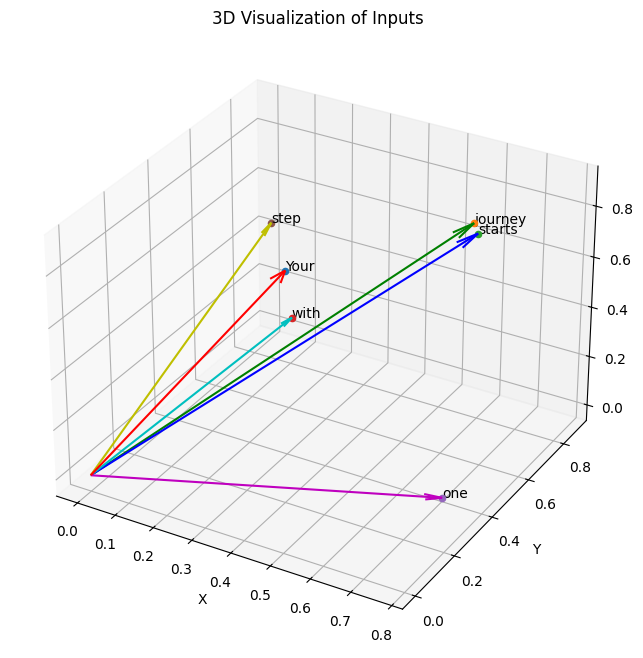

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
words=['Your','journey','starts','with','one','step']
x_coords=inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
colors = ['r','g','b','c','m','y']

for x,y,z,words,color in zip(x_coords,y_coords,z_coords,words,colors):
  ax.scatter(x, y, z)
  ax.text(x,y,z,words)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Visualization of Inputs')


for x,y,z,color in zip(x_coords,y_coords,z_coords,colors):
  ax.quiver(0,0,0,x,y, z, color=color,linewidth=1.5, arrow_length_ratio=0.05)




plt.show()



In [ ]:
query=inputs[1]
attent2_scores=torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
  attent2_scores[i]=torch.dot(x_i,query)

print(attent2_scores)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0535])


Normalisation

In [ ]:
attn_weights2_tmp=attent2_scores/attent2_scores.sum()
print("Attention weights:",attn_weights2_tmp)
print("Sum:",attn_weights2_tmp.sum())

Attention weights: tensor([0.1462, 0.2290, 0.2260, 0.1292, 0.1083, 0.1614])
Sum: tensor(1.)


Naive-Softmax


In [ ]:
def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum()

attn_weights2=softmax_naive(attent2_scores)
print("Attention weights:",attn_weights2)
print("Sum:",attn_weights2.sum())

Attention weights: tensor([0.1393, 0.2391, 0.2345, 0.1246, 0.1087, 0.1538])
Sum: tensor(1.)


In [ ]:
attn_weights2=torch.softmax(attent2_scores,dim=0)
print("Attention weights:",attn_weights2)
print("Sum:",attn_weights2.sum())

Attention weights: tensor([0.1393, 0.2391, 0.2345, 0.1246, 0.1087, 0.1538])
Sum: tensor(1.)


Context vector for query[1]

In [ ]:
query=inputs[1]
context_vec2=torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
  context_vec2+=attn_weights2[i]*x_i

print(context_vec2)

tensor([0.4439, 0.6507, 0.5607])


In [ ]:
import torch
inputs=torch.tensor(
    [[0.43,0.15,0.89],
     [0.55,0.87,0.66],
     [0.57,0.85,0.64],
     [0.22,0.58,0.33],
     [0.77,0.25,0.10],
     [0.05,0.80,0.50],
     [0.4439,0.6507,0.5607]
     ]
)
print(inputs)



tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5000],
        [0.4439, 0.6507, 0.5607]])


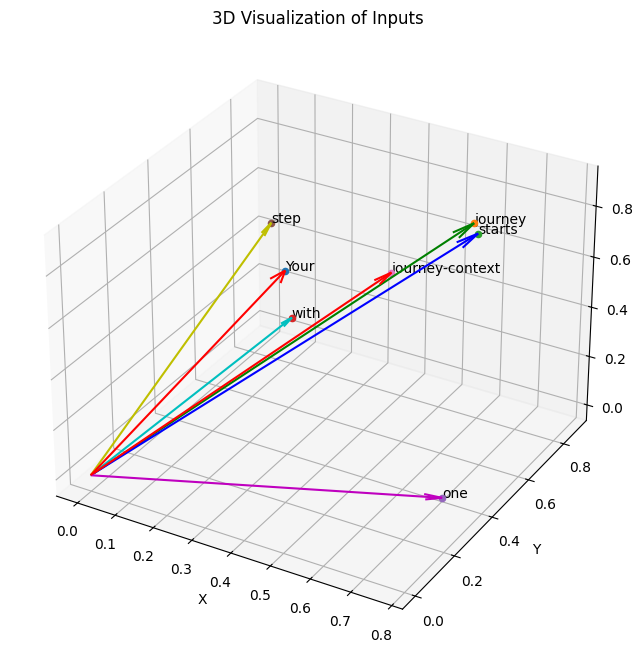

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
words=['Your','journey','starts','with','one','step','journey-context']
x_coords=inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
colors = ['r','g','b','c','m','y','r']

for x,y,z,words,color in zip(x_coords,y_coords,z_coords,words,colors):
  ax.scatter(x, y, z)
  ax.text(x,y,z,words)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Visualization of Inputs')


for x,y,z,color in zip(x_coords,y_coords,z_coords,colors):
  ax.quiver(0,0,0,x,y, z, color=color,linewidth=1.5, arrow_length_ratio=0.05)




plt.show()



In [ ]:
import torch
inputs=torch.tensor(
    [[0.43,0.15,0.89],
     [0.55,0.87,0.66],
     [0.57,0.85,0.64],
     [0.22,0.58,0.33],
     [0.77,0.25,0.10],
     [0.05,0.80,0.50]
     ]
)
print(inputs)



# attn_scores = torch.empty(6, 6)

# for i, x_i in enumerate(inputs):
#     for j, x_j in enumerate(inputs):
#         attn_scores[i, j] = torch.dot(x_i, x_j)

# print(attn_scores)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5000]])


Optimizing the multiplication

In [ ]:
attn_scores=torch.matmul(inputs,inputs.transpose(0,1))
print(attn_scores)


tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.5865],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0535],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0285],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6400],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2885],
        [0.5865, 1.0535, 1.0285, 0.6400, 0.2885, 0.8925]])


In [ ]:
attn_weights=torch.softmax(attn_scores,dim=-1)
print("Attention weights:\n",attn_weights)
print("Sum:",attn_weights.sum())

Attention weights:
 tensor([[0.2112, 0.2019, 0.1994, 0.1250, 0.1228, 0.1397],
        [0.1393, 0.2391, 0.2345, 0.1246, 0.1087, 0.1538],
        [0.1397, 0.2381, 0.2338, 0.1248, 0.1113, 0.1523],
        [0.1439, 0.2080, 0.2051, 0.1466, 0.1267, 0.1697],
        [0.1527, 0.1960, 0.1976, 0.1368, 0.1880, 0.1290],
        [0.1369, 0.2183, 0.2129, 0.1444, 0.1016, 0.1859]])
Sum: tensor(6.)


In [ ]:
all_context_vecs=attn_weights @ inputs
print(all_context_vecs)

tensor([[0.4446, 0.5918, 0.5722],
        [0.4439, 0.6507, 0.5607],
        [0.4451, 0.6488, 0.5595],
        [0.4315, 0.6293, 0.5425],
        [0.4674, 0.5909, 0.5201],
        [0.4196, 0.6493, 0.5529]])


In [ ]:
d_in=inputs.shape[1]
print(inputs)
print(d_in)
d_out=2
torch.manual_seed(42)

W_Q=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_K=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_V=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5000]])
3


In [ ]:
print("inputs[0].shape:", inputs[0].shape)
print(W_Q)
print(W_K)
print(W_V)

inputs[0].shape: torch.Size([3])
Parameter containing:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593],
        [0.3904, 0.6009]])
Parameter containing:
tensor([[0.2566, 0.7936],
        [0.9408, 0.1332],
        [0.9346, 0.5936]])
Parameter containing:
tensor([[0.8694, 0.5677],
        [0.7411, 0.4294],
        [0.8854, 0.5739]])


For the word 'journey'

In [ ]:
query2=inputs[1] @ W_Q
key2=inputs[1] @ W_K
value2=inputs[1] @ W_V
print(query2)
print(key2)
print(value2)

tensor([1.0760, 1.7344])
tensor([1.5764, 0.9441])
tensor([1.7073, 1.0646])


In general

In [ ]:
keys = inputs @ W_K
values = inputs @ W_V
queries = inputs @ W_Q
print("keys.shape:", keys.shape)

print("values.shape:", values.shape)

print("queries.shape:", queries.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])
queries.shape: torch.Size([6, 2])


In [ ]:
attn_scores2=query2 @ keys.transpose(0,1)
print(attn_scores2)


tensor([2.7084, 3.3338, 3.3013, 1.7563, 1.7869, 2.0949])


In [ ]:
attn_scores= queries @ keys.transpose(0,1)
print(attn_scores)


tensor([[1.8033, 2.2486, 2.2247, 1.1941, 1.1672, 1.4418],
        [2.7084, 3.3338, 3.3013, 1.7563, 1.7869, 2.0949],
        [2.6993, 3.3251, 3.2925, 1.7525, 1.7789, 2.0918],
        [1.4408, 1.7618, 1.7454, 0.9243, 0.9596, 1.0954],
        [1.7754, 2.2317, 2.2067, 1.1910, 1.1353, 1.4486],
        [1.5817, 1.9116, 1.8954, 0.9954, 1.0709, 1.1660]])


In [ ]:
d_k=keys.shape[-1]
attn_scores2=torch.softmax(attn_scores2/d_k**0.5,dim=-1)
print(attn_scores2)
print(d_k)

tensor([0.1737, 0.2703, 0.2642, 0.0886, 0.0905, 0.1126])
2


In [ ]:
context_vec2=attn_weights2 @ values
print(context_vec2)

tensor([1.3646, 0.8532])


General class for Self Attention

In [ ]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.W_Q=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
    self.W_K=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
    self.W_V=torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)

  def forward(self,x):
    keys=x @ self.W_K
    queries=x @ self.W_Q
    values=x @ self.W_V

    attn_scores=queries @ keys.transpose(0,1)
    attn_weights=torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)


    context_vec=attn_weights @ values
    return context_vec

In [ ]:
torch.manual_seed(123)
sa_v1=SelfAttention_v1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.2984, 0.7981],
        [0.3049, 0.8140],
        [0.3046, 0.8133],
        [0.2936, 0.7867],
        [0.2916, 0.7820],
        [0.2971, 0.7952]])


Optimized General Class for Self Attention

In [ ]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_Q = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_K   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_V= nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_K(x)
        queries = self.W_Q(x)
        values = self.W_V(x)

        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

In [ ]:
torch.manual_seed(321)
sa_v2=SelfAttention_v2(d_in,d_out)
print(sa_v2(inputs))
keys=sa_v2.W_K(inputs)
queries=sa_v2.W_Q(inputs)
values=sa_v2.W_V(inputs)
attn_scores=keys @ queries.transpose(0,1)
attn_weights=torch.softmax(attn_scores/keys.shape[-1]**0.5,dim=-1)
context_vec=attn_weights @ values
print(attn_weights)



tensor([[-0.3819, -0.0502],
        [-0.3816, -0.0480],
        [-0.3816, -0.0482],
        [-0.3810, -0.0477],
        [-0.3797, -0.0527],
        [-0.3817, -0.0455]], grad_fn=<MmBackward0>)
tensor([[0.1769, 0.1668, 0.1670, 0.1613, 0.1691, 0.1589],
        [0.1741, 0.1679, 0.1678, 0.1631, 0.1630, 0.1641],
        [0.1740, 0.1678, 0.1677, 0.1631, 0.1635, 0.1639],
        [0.1700, 0.1677, 0.1675, 0.1652, 0.1627, 0.1668],
        [0.1699, 0.1656, 0.1660, 0.1645, 0.1729, 0.1611],
        [0.1709, 0.1687, 0.1683, 0.1650, 0.1583, 0.1689]],
       grad_fn=<SoftmaxBackward0>)


Hiding Future Words with Causal Attention

In [ ]:
context_length=inputs.shape[0]
mask_simple=torch.tril(torch.ones((context_length,context_length)))
print(mask_simple)


tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [ ]:
masked_simple=attn_weights * mask_simple
print(masked_simple)

tensor([[0.1769, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1741, 0.1679, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1740, 0.1678, 0.1677, 0.0000, 0.0000, 0.0000],
        [0.1700, 0.1677, 0.1675, 0.1652, 0.0000, 0.0000],
        [0.1699, 0.1656, 0.1660, 0.1645, 0.1729, 0.0000],
        [0.1709, 0.1687, 0.1683, 0.1650, 0.1583, 0.1689]],
       grad_fn=<MulBackward0>)


In [ ]:
row_sums=masked_simple.sum(dim=1)
masked_simple=masked_simple/row_sums[:,None]
print(masked_simple)


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5091, 0.4909, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3415, 0.3294, 0.3291, 0.0000, 0.0000, 0.0000],
        [0.2536, 0.2502, 0.2499, 0.2464, 0.0000, 0.0000],
        [0.2026, 0.1974, 0.1978, 0.1961, 0.2061, 0.0000],
        [0.1709, 0.1687, 0.1683, 0.1650, 0.1583, 0.1689]],
       grad_fn=<DivBackward0>)


In [ ]:
print(attn_scores)
mask=torch.triu(torch.ones((context_length,context_length)),diagonal=1)
masked=attn_scores.masked_fill(mask.bool(),-torch.inf)
print(masked)

tensor([[ 0.1377,  0.0548,  0.0567,  0.0072,  0.0742, -0.0134],
        [ 0.1203,  0.0691,  0.0679,  0.0277,  0.0272,  0.0361],
        [ 0.1171,  0.0659,  0.0649,  0.0256,  0.0289,  0.0321],
        [ 0.0629,  0.0438,  0.0422,  0.0222,  0.0005,  0.0363],
        [ 0.0263, -0.0102, -0.0071, -0.0195,  0.0509, -0.0492],
        [ 0.0913,  0.0734,  0.0697,  0.0422, -0.0167,  0.0748]],
       grad_fn=<MmBackward0>)
tensor([[ 0.1377,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 0.1203,  0.0691,    -inf,    -inf,    -inf,    -inf],
        [ 0.1171,  0.0659,  0.0649,    -inf,    -inf,    -inf],
        [ 0.0629,  0.0438,  0.0422,  0.0222,    -inf,    -inf],
        [ 0.0263, -0.0102, -0.0071, -0.0195,  0.0509,    -inf],
        [ 0.0913,  0.0734,  0.0697,  0.0422, -0.0167,  0.0748]],
       grad_fn=<MaskedFillBackward0>)


In [ ]:
attn_weights=torch.softmax(masked/keys.shape[-1]**0.5,dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5091, 0.4909, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3415, 0.3294, 0.3291, 0.0000, 0.0000, 0.0000],
        [0.2536, 0.2502, 0.2499, 0.2464, 0.0000, 0.0000],
        [0.2026, 0.1974, 0.1978, 0.1961, 0.2061, 0.0000],
        [0.1709, 0.1687, 0.1683, 0.1650, 0.1583, 0.1689]],
       grad_fn=<SoftmaxBackward0>)


Masking additional weights with dropout

In [ ]:
#example to demonstrate dropout

example=torch.ones(6,6)
example
torch.manual_seed(123)

dropout=torch.nn.Dropout(0.5)
dropout(example)

tensor([[2., 2., 2., 2., 2., 2.],
        [0., 2., 0., 0., 0., 0.],
        [0., 0., 2., 0., 2., 0.],
        [2., 2., 0., 0., 0., 2.],
        [2., 0., 0., 0., 0., 2.],
        [0., 2., 0., 0., 0., 0.]])

In [ ]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9819, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6583, 0.0000, 0.0000, 0.0000],
        [0.5071, 0.5003, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4051, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3374, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


In [ ]:
context_vec=attn_weights @ values
print(context_vec)

tensor([[-0.3144, -0.3335],
        [-0.4179, -0.1749],
        [-0.4510, -0.1236],
        [-0.4144, -0.0744],
        [-0.3801, -0.0941],
        [-0.3816, -0.0491]], grad_fn=<MmBackward0>)


In [ ]:
batch=torch.stack((inputs,inputs),dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


Implement Causal Attention Class

In [ ]:
class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out,context_length,dropout, qkv_bias=False):
        super().__init__()
        self.d_out=d_out
        self.W_Q = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_K   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_V= nn.Linear(d_in, d_out, bias=qkv_bias)
        self.dropout=nn.Dropout(dropout)
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        b,num_tokens,d_in=x.shape
        keys = self.W_K(x)
        queries = self.W_Q(x)
        values = self.W_V(x)

        attn_scores = queries @ keys.transpose(1,2)

        attn_scores.masked_fill_(
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights=self.dropout(attn_weights)

        context_vec = attn_weights @ values
        return context_vec

In [ ]:
print(d_in)
print(d_out)

3
2


In [ ]:
torch.manual_seed(123)
context_length=batch.shape[1]


ca=CausalAttention(d_in,d_out,context_length,0.0)
context_vecs=ca(batch)
print(context_vecs.shape)
print(context_vecs)




torch.Size([2, 6, 2])
tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5279, -0.1113]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5279, -0.1113]]], grad_fn=<UnsafeViewBackward0>)


Multi-Head Attention

In [ ]:
class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,num_heads,dropout,qkv_bias=False):
    super().__init__()
    self.heads=nn.ModuleList(
        [CausalAttention(d_in,d_out,context_length,dropout,qkv_bias) for _ in range(num_heads)]
    )

  def forward(self,x):
    return torch.cat([h(x) for h in self.heads],dim=-1)

In [ ]:
import torch
inputs=torch.tensor(
    [[0.43,0.15,0.89],
     [0.55,0.87,0.66],
     [0.57,0.85,0.64],
     [0.22,0.58,0.33],
     [0.77,0.25,0.10],
     [0.05,0.80,0.50]
     ]
)

batch=torch.stack((inputs,inputs),dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


In [ ]:
torch.manual_seed(123)
context_length=batch.shape[1]
d_in,d_out=3,2
mha=MultiHeadAttention(d_in,d_out,context_length,2,0.0)
context_vecs=mha(batch)
print(context_vecs)
print(context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5279, -0.1113,  0.5052,  0.3496]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5279, -0.1113,  0.5052,  0.3496]]], grad_fn=<CatBackward0>)
torch.Size([2, 6, 4])


Optimized Multi-Head Attention

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [ ]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])


Implementing GPT model from scratch

In [ ]:
GPT_CONFIG_124M={
    "vocab_size":50257,
    "context_length":1024,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,  #no of transformers
    "drop_rate":0.1,
    "qkv_bias":False
}


Dummy GPT Model Class

In [ ]:
import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

In [ ]:
import tiktoken
tokenizer=tiktoken.get_encoding("gpt2")
batch=[]
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch=torch.stack(batch,dim=0)


print(batch)



tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


Example for Layer Normalisation

In [ ]:
torch.manual_seed(456)
batch_example=torch.randn(2,5)
layer=nn.Sequential(nn.Linear(5,6),nn.ReLU())

out=layer(batch_example)
print(out)

mean=out.mean(dim=-1,keepdim=True)
var=out.var(dim=-1,keepdim=True)

print(mean)
print(var)

tensor([[0.3315, 0.0000, 1.9723, 0.3871, 0.0000, 0.4579],
        [0.2400, 0.4339, 0.5223, 0.0000, 0.2309, 0.0000]],
       grad_fn=<ReluBackward0>)
tensor([[0.5248],
        [0.2378]], grad_fn=<MeanBackward1>)
tensor([[0.5414],
        [0.0465]], grad_fn=<VarBackward0>)


In [ ]:
out_norm=(out-mean)/torch.sqrt(var)
mean_norm=out_norm.mean(dim=-1,keepdim=True)
var_norm=out_norm.var(dim=-1,keepdim=True)
print(mean_norm)
print(var_norm)
print("Normalised layer outputs:\n", out_norm)

torch.set_printoptions(sci_mode=False)
print(mean_norm)
print(var_norm)


tensor([[-2.4835e-09],
        [ 7.9473e-08]], grad_fn=<MeanBackward1>)
tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)
Normalised layer outputs:
 tensor([[-0.2627, -0.7133,  1.9673, -0.1872, -0.7133, -0.0909],
        [ 0.0101,  0.9091,  1.3189, -1.1029, -0.0323, -1.1029]],
       grad_fn=<DivBackward0>)
tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [ ]:
class LayerNorm(nn.Module):
  def __init__(self,emb_dim):
    super().__init__()
    self.eps=1e-5
    self.scale=nn.Parameter(torch.ones(emb_dim))
    self.shift=nn.Parameter(torch.zeros(emb_dim))

  def forward(self,x):
    mean=x.mean(dim=-1,keepdim=True)
    var=x.var(dim=-1,keepdim=True,unbiased=False)
    norm_x=(x-mean)/torch.sqrt(var+self.eps)
    return self.scale*norm_x+self.shift ## acts as a knob




In [ ]:
ln=LayerNorm(emb_dim=5)
out=ln(batch_example)
mean=out.mean(dim=-1,keepdim=True)
var=out.var(dim=-1,keepdim=True,unbiased=False)
print(mean)
print(var)
print(out)

tensor([[     0.0000],
        [    -0.0000]], grad_fn=<MeanBackward1>)
tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)
tensor([[-1.5236,  0.7289,  1.3287, -0.6130,  0.0790],
        [ 0.4369,  1.1287, -1.2070,  0.8242, -1.1828]], grad_fn=<AddBackward0>)


FEEDFORWARD NEURAL NETWORK WITH GELU ACTIVATION

In [ ]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self,x):
     return 0.5*x*(1+torch.tanh(math.sqrt(2/math.pi)*(x+0.044715*torch.pow(x,3))))


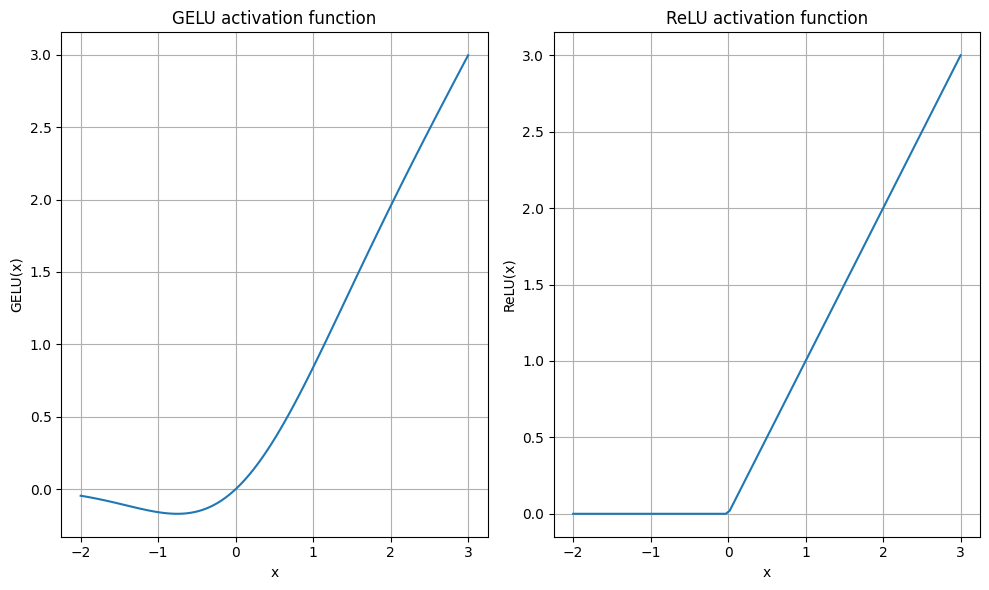

In [ ]:
import math
gelu = GELU()
relu = nn.ReLU()


x = torch.linspace(-2, 3, 100)
y_gelu = gelu(x)
y_relu = relu(x)


plt.figure(figsize=(10, 6))
for i, (y, label) in enumerate(zip([y_gelu, y_relu], ["GELU", "ReLU"]), 1):
    plt.subplot(1, 2, i)
    plt.plot(x.detach().numpy(), y.detach().numpy())
    plt.title(f"{label} activation function")
    plt.xlabel("x")
    plt.ylabel(f"{label}(x)")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
GPT_CONFIG_124M={
    "vocab_size":50257,
    "context_length":1024,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,
    "drop_rate":0.1,
    "qkv_bias":False
}

FeedForward Neural Network

In [ ]:
class FeedForward(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        emb_dim = cfg["emb_dim"]
        self.layers = nn.Sequential(
            nn.Linear(emb_dim, 4 * emb_dim),  # Expansion
            GELU(),
            nn.Linear(4 * emb_dim, emb_dim),  # Contraction
        )

    def forward(self, x):
        return self.layers(x)


In [ ]:
ffn=FeedForward(GPT_CONFIG_124M)
x=torch.rand(2,3,768)
out=ffn(x)
print(out.shape)

torch.Size([2, 3, 768])


In [ ]:
import torch
import torch.nn as nn
from torch.nn import GELU

class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut

        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), GELU()),
        ])

    def forward(self, x):
        for layer in self.layers:
                layer_output= layer(x)

                if self.use_shortcut:
                    x = x + layer_output
                else:
                  x=layer_output
        return x


In [ ]:
layer_sizes=[3,3,3,3,3,1]
sample_input=torch.tensor([[1.,0.,-1]])
torch.manual_seed(123)
model_without_shortcuts=ExampleDeepNeuralNetwork(layer_sizes,use_shortcut=False)
model_with_shortcuts=ExampleDeepNeuralNetwork(layer_sizes,use_shortcut=True)

out1=model_without_shortcuts(sample_input)
out2=model_with_shortcuts(sample_input)
print(out1)
print(out2)

tensor([[0.0610]], grad_fn=<GeluBackward0>)
tensor([[1.9653, 1.1175, 0.3669]], grad_fn=<AddBackward0>)


Next, implementing a function that computes gradients thorugh back-propagation

In [ ]:
def print_gradients(model,x):
  output=model(x)
  target=torch.tensor([[0.0]])
  loss=nn.MSELoss()
  loss=loss(output,target)

  loss.backward()

  for name,param in model.named_parameters():
    if 'weight' in name:
      print(f"{name} has a gradient mean of : {param.grad.abs().mean().item()}")   #finding mean , item is to list them as floa



print_gradients(model_without_shortcuts,sample_input)
print("Printing with shorcuts \n")
print_gradients(model_with_shortcuts,sample_input)


layers.0.0.weight has a gradient mean of : 0.00020174120436422527
layers.1.0.weight has a gradient mean of : 0.00012011769285891205
layers.2.0.weight has a gradient mean of : 0.0007152436301112175
layers.3.0.weight has a gradient mean of : 0.00139885104727
layers.4.0.weight has a gradient mean of : 0.005049602594226599
Printing with shorcuts 

layers.0.0.weight has a gradient mean of : 0.6178962588310242
layers.1.0.weight has a gradient mean of : 0.15985533595085144
layers.2.0.weight has a gradient mean of : 0.3972356617450714
layers.3.0.weight has a gradient mean of : 0.44717729091644287
layers.4.0.weight has a gradient mean of : 1.3972896337509155


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
class TransformerBlock(nn.Module):
  def __init__(self,cfg):
    super().__init__()

    self.norm1=LayerNorm(cfg["emb_dim"])
    self.norm2=LayerNorm(cfg["emb_dim"])
    self.att=MultiHeadAttention(cfg["emb_dim"],cfg["emb_dim"],cfg["context_length"],cfg["drop_rate"],cfg["n_heads"],cfg["qkv_bias"])
    self.ffn=FeedForward(cfg)
    self.drop_shortcut=nn.Dropout(cfg["drop_rate"])


  def forward(self,x):
    shortcut=x
    x=self.norm1(x)
    x=self.att(x)
    x=self.drop_shortcut(x)
    x=x+shortcut

    shortcut=x
    x=self.norm2(x)
    x=self.ffn(x)
    x=self.drop_shortcut(x)
    x=x+shortcut

    return x


In [ ]:
torch.manual_seed(123)
x=torch.rand(2,4,768)
block = TransformerBlock(GPT_CONFIG_124M)
print(x.shape)
print(block(x).shape)


torch.Size([2, 4, 768])
torch.Size([2, 4, 768])


In [ ]:
GPT_CONFIG_124M={
    "vocab_size":50257,
    "context_length":256,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,
    "drop_rate":0.1,
    "qkv_bias":False
}

In [ ]:
import torch
import torch.nn as nn

class GPT_MODEL(nn.Module):
  def __init__(self,cfg):
    super().__init__()

    self.tok_emb=nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
    self.pos_emb=nn.Embedding(cfg["context_length"],cfg["emb_dim"])
    self.drop_emb=nn.Dropout(cfg["drop_rate"])
    self.trf_blocks=nn.Sequential(*[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
    self.final_norm=LayerNorm(cfg["emb_dim"])
    self.out_head=nn.Linear(cfg["emb_dim"],cfg["vocab_size"],bias=False)

  def forward(self,in_idx):
    batch_size,seq_len=in_idx.shape
    tok_embeds=self.tok_emb(in_idx)
    pos_embeds=self.pos_emb(torch.arange(seq_len,device=in_idx.device))
    x=tok_embeds+pos_embeds
    x=self.drop_emb(x)
    x=self.trf_blocks(x)
    x=self.final_norm(x)
    logits=self.out_head(x)
    return logits

In [ ]:
model=GPT_MODEL(GPT_CONFIG_124M)
out=model(batch)
print("Input shape: ",input.shape)
print("Output shape: ",out.shape)
print(out)

Input shape:  torch.Size([4, 4])
Output shape:  torch.Size([2, 4, 50257])
tensor([[[-0.3166,  0.5370,  0.3163,  ...,  0.9845, -0.5438,  0.0925],
         [ 0.0698, -0.1865, -0.0552,  ...,  0.8024, -0.5270,  0.5480],
         [-0.4431, -0.3401,  0.1785,  ...,  1.2576, -0.3351,  0.7830],
         [-0.6182, -0.7620,  0.1005,  ..., -0.1971, -0.5618,  0.5412]],

        [[-0.2238,  0.8859,  0.2333,  ...,  0.6273, -0.4868, -0.3824],
         [ 0.1298,  0.3031, -0.2225,  ...,  0.1884, -0.0256, -0.3666],
         [-0.4060, -0.8483,  0.9620,  ...,  0.8352,  0.0971,  0.7325],
         [-0.2864, -0.3700, -0.3789,  ..., -0.4660,  0.0617,  0.4794]]],
       grad_fn=<UnsafeViewBackward0>)


In [ ]:
total_params=sum(p.numel() for p in model.parameters())
print(f"Total number of parametrs: {total_params:,}")

Total number of parametrs: 162,419,712


Generate text from output tokens

In [ ]:
def generate_text_token(model,idx,max_new_tokens,context_length):
  model.eval()

  for _ in range(max_new_tokens):
    idx_cond=idx[:,-context_length:]

    with torch.no_grad():
      logits=model(idx_cond)
    logits=logits[:,-1,:]
    probs=torch.softmax(logits,dim=-1)
    idx_next=torch.argmax(probs,dim=-1,keepdim=True)

    idx=torch.cat((idx,idx_next),dim=-1)
  return idx

In [ ]:
start_context="Hello, I am a"
encoded=tokenizer.encode(start_context)
print("encoded:",encoded)
encoded_tensor=torch.tensor(encoded).unsqueeze(0)
print(encoded_tensor.shape)
print("encoded_tensor:",encoded_tensor)


out=generate_text_token(model=model,idx=encoded_tensor,max_new_tokens=6,context_length=GPT_CONFIG_124M["context_length"])
print(out)
print(tokenizer.decode(out.squeeze(0).tolist()))

encoded: [15496, 11, 314, 716, 257]
torch.Size([1, 5])
encoded_tensor: tensor([[15496,    11,   314,   716,   257]])
tensor([[15496,    11,   314,   716,   257, 44802, 17573, 37345, 40445, 35502,
         23105]])
Hello, I am aGy Collector� handset mindfulness hi


In [ ]:
GPT_CONFIG_124M={
    "vocab_size":50257,
    "context_length":1024,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,  #no of transformers
    "drop_rate":0.1,
    "qkv_bias":False
}
torch.manual_seed(456)
model=GPT_MODEL(GPT_CONFIG_124M)
model.eval()

GPT_MODEL(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ffn): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNo

In [ ]:
def texttotoken(text,tokenizer):
  encoded=tokenizer.encode(text,allowed_special={"<|endoftext|>"})
  encoded_tensor=torch.tensor(encoded).unsqueeze(0)
  return encoded_tensor
def tokentotext(tokenids,tokenizer):
  flat=tokenids.squeeze(0)
  decoded=tokenizer.decode(flat.tolist())
  return decoded

start_context="Every effort moves you"
tokenizer=tiktoken.get_encoding("gpt2")
token_ids=generate_text_token(model,texttotoken(start_context,tokenizer),max_new_tokens=10,context_length=GPT_CONFIG_124M["context_length"])
print("Output text\n: ",tokentotext(token_ids,tokenizer))

Output text
:  Every effort moves youerateadmin controllers js marijuana Claus coli roadside zeroConn


In [ ]:
inputs=torch.tensor([
    [16833,3626,6100], # "every effort moves"
    [40,1107,588] # "I really like"
    ])

targets=torch.tensor([
    [3626,6100,345], #"effort makes you"
    [1107,588,11311]  #"really like chocolate"
    ])

In [ ]:
with torch.no_grad():
  logists=model(inputs)
probas=torch.softmax(logists,dim=-1) # we need the maximum token probability for each word to compare to the target
print(probas.shape)

token_ids=torch.argmax(probas,dim=-1,keepdim=True)
print(token_ids)

torch.Size([2, 3, 50257])
tensor([[[22994],
         [ 5910],
         [39014]],

        [[20597],
         [ 5910],
         [15663]]])


Decode the output token ids

In [ ]:
print(f"Targets batch 1:{tokentotext(targets[0],tokenizer)}")
print(f"Outputs batch 1:{tokentotext(token_ids[0].squeeze(),tokenizer)}")

Targets batch 1: effort moves you
Outputs batch 1: Stickobeapply


Cross entropy loss using library which calculates the softtmax to logists and negative log likelihood (done after flattening the batch of logists)

In [ ]:
text_idx=0
target_probas1=probas[text_idx,range(len(targets[1])),targets[text_idx]]
print(target_probas1)
text_idx=1
target_probas2=probas[text_idx,[0,1,2],targets[text_idx]]
print(target_probas2)

tensor([    0.0000,     0.0000,     0.0000])
tensor([    0.0000,     0.0000,     0.0000])


In [ ]:
log_probas=torch.log(torch.cat((target_probas1,target_probas2)))
print(log_probas)

avg_log_probas=torch.mean(log_probas)
print(avg_log_probas)

tensor([-12.7015, -10.9444, -10.9477, -10.9264, -12.4599, -11.1886])
tensor(-11.5281)


Simpler way of doing using library


In [ ]:
logists_flat=logists.flatten(0,1)
print(logists_flat.shape)
targets_flat=targets.flatten()
print(targets_flat.shape)

torch.Size([6, 50257])
torch.Size([6])


In [ ]:
loss=torch.nn.functional.cross_entropy(logists_flat,targets_flat)
print(loss)

tensor(11.5281)


Perplexity

In [ ]:
perplexity=torch.exp(loss)
print(perplexity)

tensor(101528.8359)


In [ ]:
# import os
# import urllib.request

# file_path = "war_of_the_worlds.txt"
# url = "https://www.gutenberg.org/files/36/36-0.txt"

# if not os.path.exists(file_path):
#     with urllib.request.urlopen(url) as response:
#         raw_text = response.read().decode('utf-8')
#     with open(file_path, "w", encoding="utf-8") as file:
#         file.write(raw_text)
# else:
#     with open(file_path, "r", encoding="utf-8") as file:
#         raw_text = file.read()

import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://raw.githubusercontent.com/rasbt/LLMs-from-scratch/main/ch02/01_main-chapter-code/the-verdict.txt"

if not os.path.exists(file_path):
    with urllib.request.urlopen(url) as response:
        text_data = response.read().decode('utf-8')
    with open(file_path, "w", encoding="utf-8") as file:
        file.write(text_data)
else:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()


In [ ]:
total_characters = len(raw_text)
total_tokens = len(tokenizer.encode(raw_text))

print("Characters:", total_characters)
print("Tokens:", total_tokens)

Characters: 20479
Tokens: 5145


In [ ]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [ ]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,   # Vocabulary size
    "context_length": 256, # Shortened context length (orig: 1024)
    "emb_dim": 768,        # Embedding dimension
    "n_heads": 12,         # Number of attention heads
    "n_layers": 12,        # Number of layers
    "drop_rate": 0.1,      # Dropout rate
    "qkv_bias": False      # Query-key-value bias
}


Splitting the dataset

In [ ]:

train_ratio = 0.9
split_idx = int(train_ratio * len(raw_text))
train_data = raw_text[:split_idx]
val_data = raw_text[split_idx:]


torch.manual_seed(123)

train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

Sanity Check

In [ ]:

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "increase the `training_ratio`")

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "decrease the `training_ratio`")

In [ ]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)



print(len(train_loader))

print(len(val_loader))





Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9
1


In [ ]:
import torch
import torch.nn as nn

class GPT_MODEL(nn.Module):
  def __init__(self,cfg):
    super().__init__()

    self.tok_emb=nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
    self.pos_emb=nn.Embedding(cfg["context_length"],cfg["emb_dim"])
    self.drop_emb=nn.Dropout(cfg["drop_rate"])
    self.trf_blocks=nn.Sequential(*[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])
    self.final_norm=LayerNorm(cfg["emb_dim"])
    self.out_head=nn.Linear(cfg["emb_dim"],cfg["vocab_size"],bias=False)

  def forward(self,in_idx):
    batch_size,seq_len=in_idx.shape
    tok_embeds=self.tok_emb(in_idx)
    pos_embeds=self.pos_emb(torch.arange(seq_len,device=in_idx.device))
    x=tok_embeds+pos_embeds
    x=self.drop_emb(x)
    x=self.trf_blocks(x)
    x=self.final_norm(x)
    logits=self.out_head(x)
    return logits

torch.manual_seed(123)
model=GPT_MODEL(GPT_CONFIG_124M)
model.eval()

GPT_MODEL(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ffn): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNor

In [ ]:
def calc_loss_batch(input_batch,target_batch,model,device):
  input_batch=input_batch.to(device)
  target_batch=target_batch.to(device)
  logits=model(input_batch)
  loss=torch.nn.functional.cross_entropy(logits.flatten(0,1),target_batch.flatten())
  return loss

def calc_loss_loader(data_loader,model,device,num_batches=None):
    total_loss=0.0
    if num_batches is None:
        num_batches = len(data_loader)

    for batch_idx, (input_batch, target_batch) in enumerate(data_loader):
        if num_batches is not None and batch_idx >= num_batches:
            break
        else:
          loss=calc_loss_batch(input_batch,target_batch,model,device)
          total_loss+=loss.item()
    return total_loss/num_batches

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#
# print(f"Using {device} device.")


model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(456) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987581464979383
Validation loss: 10.98110580444336


Backpropagating

In [ ]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [ ]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss


def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = texttotoken(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_token(
            model=model, idx=encoded,
            max_new_tokens=50, context_length=context_size
        )
    decoded_text = tokentotext(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

In [ ]:

# import time
# start_time = time.time()

# torch.manual_seed(123)
# model = GPT_MODEL(GPT_CONFIG_124M)
# model.to(device)
# optimizer =torch.optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.1)
# num_epochs = 10
# train_losses, val_losses, tokens_seen = train_model_simple(
#     model, train_loader, val_loader, optimizer, device,
#     num_epochs=num_epochs, eval_freq=5, eval_iter=5,
#     start_context="Every effort moves you", tokenizer=tokenizer
# )

# # Note:
# # Uncomment the following code to show the execution time
# end_time = time.time()
# execution_time_minutes = (end_time - start_time) / 60
# print(f"Training completed in {execution_time_minutes:.2f} minutes.")

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_token(
    model=model,
    idx=texttotoken("Every effort moves you", tokenizer),
    max_new_tokens=25,
    context_length=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", tokentotext(token_ids, tokenizer))

Output text:
 Every effort moves you rentingetic wasnم refres RexMeCHicular stren Mortgage TT remember gard ACTIONSussedOND Land Engeleddedemate breaths proxies GalaxyForm


In [ ]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}

inverse_vocab = {v: k for k, v in vocab.items()}

In [ ]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

next_token_logits2 = next_token_logits/0.1

next_token_logits3 = next_token_logits/5

In [ ]:
probas = torch.softmax(next_token_logits2, dim=0)

print(probas)



tensor([    0.0000,     0.0000,     0.0000,     0.9910,     0.0000,     0.0000,
            0.0000,     0.0090,     0.0000])


In [ ]:
probas=torch.softmax(next_token_logits,dim=-1)
print(probas)
next_token_id=torch.argmax(probas,dim=-1).item()
print(next_token_id)
print(inverse_vocab[next_token_id])

tensor([    0.0609,     0.0016,     0.0001,     0.5721,     0.0034,     0.0001,
            0.0001,     0.3576,     0.0040])
3
forward


Top k sampling

In [ ]:
top_k=3
top_k_probas,top_k_indices=torch.topk(probas,top_k)
print(top_k_probas)
print(top_k_indices)

tensor([0.5721, 0.3576, 0.0609])
tensor([3, 7, 0])


Replacing other values by -inf

In [ ]:
new_logists=torch.where(
    condition=next_token_logits<top_k_probas[-1],
    input=torch.tensor(float("-inf")),
    other=next_token_logits
)
print(new_logists)

topk_probas=torch.softmax(new_logists,dim=-1)
print(topk_probas)


tensor([4.5100, 0.8900,   -inf, 6.7500, 1.6300,   -inf,   -inf, 6.2800, 1.7900])
tensor([0.0609, 0.0016, 0.0000, 0.5723, 0.0034, 0.0000, 0.0000, 0.3577, 0.0040])


Merge Temperature and Top K

In [ ]:
#Replacement to generate_nect_token function
def generate(model, idx, max_new_tokens, context_size, temperature=0.0, top_k=None, eos_id=None):

    # For-loop is the same as before: Get logits, and only focus on last time step
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -context_size:]
        with torch.no_grad():
            logits = model(idx_cond)
        logits = logits[:, -1, :]


        if top_k is not None:
            # Keep only top_k values
            top_logits, _ = torch.topk(logits, top_k)
            min_val = top_logits[:, -1]
            logits = torch.where(logits < min_val, torch.tensor(float("-inf")).to(logits.device), logits)


        if temperature > 0.0:
            logits = logits / temperature

            # Apply softmax to get probabilities
            probs = torch.softmax(logits, dim=-1)  # (batch_size, context_len)

            # Sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)  # (batch_size, 1)

        # Otherwise same as before: get idx of the vocab entry with the highest logits value
        else:
            idx_next = torch.argmax(logits, dim=-1, keepdim=True)  # (batch_size, 1)

        if idx_next == eos_id:  # Stop generating early if end-of-sequence token is encountered and eos_id is specified
            break

        # Same as before: append sampled index to the running sequence
        idx = torch.cat((idx, idx_next), dim=1)  # (batch_size, num_tokens+1)

    return idx

In [ ]:
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate(
    model=model,
    idx=texttotoken("Every effort moves you", tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"],
    top_k=25,
    temperature=1.3
)

print("Output text:\n", tokentotext(token_ids, tokenizer))

Output text:
 Every effort moves you iv impossibility 375 prescribingatomic unethical MVGL packagesosit Parallelede blaming Respons Leaf Aura derivword Higgins JudgesBLIC bour elbows velocity nodd


Loading and Saving GPT Models


In [ ]:
model=GPT_MODEL(GPT_CONFIG_124M)
model.to(device)
torch.save(model.state_dict(),"gpt_model.pth")

In [ ]:
model=GPT_MODEL(GPT_CONFIG_124M)
model.load_state_dict(torch.load("gpt_model.pth"))
model.eval()

GPT_MODEL(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ffn): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNor

In [ ]:
optimizer=torch.optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.1)
torch.save({
    "gpt_model.pth":model.state_dict(),
    "optimizer_state_dict":optimizer.state_dict()
},
"model_and_optimizer.pth"
)


In [ ]:
checkpoint=torch.load("model_and_optimizer.pth")
model=GPT_MODEL(GPT_CONFIG_124M)
model.load_state_dict(checkpoint["gpt_model.pth"])
optimizer=torch.optim.AdamW(model.parameters(),lr=0.0004,weight_decay=0.1)
optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
model.train()

GPT_MODEL(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ffn): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNor

LOADING PRETRAINED WEIGHTS

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pretrained tokenizer and model from Hugging Face
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")  # 124M model
settings = GPT2LMHeadModel.from_pretrained("gpt2")
hf_params = model.state_dict()

# Now you can integrate model weights into your architecture


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
state_dict = settings.state_dict()
print(state_dict["transformer.wte.weight"])#token embedding weights


tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]])


In [ ]:
# Define model configurations in a dictionary for compactness
model_configs = {
    "gpt2-small (124M)": {"emb_dim": 768, "n_layers": 12, "n_heads": 12},
    "gpt2-medium (355M)": {"emb_dim": 1024, "n_layers": 24, "n_heads": 16},
    "gpt2-large (774M)": {"emb_dim": 1280, "n_layers": 36, "n_heads": 20},
    "gpt2-xl (1558M)": {"emb_dim": 1600, "n_layers": 48, "n_heads": 25},
}

# Copy the base configuration and update with specific model settings
model_name = "gpt2-small (124M)"  # Example model name
NEW_CONFIG = GPT_CONFIG_124M.copy()
NEW_CONFIG["qkv_bias"]=True
NEW_CONFIG.update(model_configs[model_name])
print(NEW_CONFIG)


{'vocab_size': 50257, 'context_length': 256, 'emb_dim': 768, 'n_heads': 12, 'n_layers': 12, 'drop_rate': 0.1, 'qkv_bias': True}


In [ ]:
NEW_CONFIG.update({
    "context_length":1024,# GPT-2 default: 1024
    "qkv_bias": True  # your custom choice
})

# Now pass into your own architecture
gpt = GPT_MODEL(NEW_CONFIG)
gpt.eval()

GPT_MODEL(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(1024, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=True)
        (W_key): Linear(in_features=768, out_features=768, bias=True)
        (W_value): Linear(in_features=768, out_features=768, bias=True)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ffn): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNorm(

In [ ]:
import torch

def load_weights_from_hf(gpt, hf_state):
    # Embeddings
    gpt.pos_emb.weight.data.copy_(hf_state["transformer.wpe.weight"])
    gpt.tok_emb.weight.data.copy_(hf_state["transformer.wte.weight"])

    # Loop over transformer blocks
    for b in range(len(gpt.trf_blocks)):
        prefix = f"transformer.h.{b}"

        # ---- Q, K, V projection ----
        qkv_w = hf_state[f"{prefix}.attn.c_attn.weight"]  # [embed, 3*embed]
        qkv_b = hf_state[f"{prefix}.attn.c_attn.bias"]    # [3*embed]
        q_w, k_w, v_w = torch.chunk(qkv_w, 3, dim=1)
        q_b, k_b, v_b = torch.chunk(qkv_b, 3, dim=0)

        gpt.trf_blocks[b].att.W_query.weight.data.copy_(q_w.T)
        gpt.trf_blocks[b].att.W_key.weight.data.copy_(k_w.T)
        gpt.trf_blocks[b].att.W_value.weight.data.copy_(v_w.T)

        gpt.trf_blocks[b].att.W_query.bias.data.copy_(q_b)
        gpt.trf_blocks[b].att.W_key.bias.data.copy_(k_b)
        gpt.trf_blocks[b].att.W_value.bias.data.copy_(v_b)

        # ---- Output projection ----
        gpt.trf_blocks[b].att.out_proj.weight.data.copy_(
            hf_state[f"{prefix}.attn.c_proj.weight"].T
        )
        gpt.trf_blocks[b].att.out_proj.bias.data.copy_(
            hf_state[f"{prefix}.attn.c_proj.bias"]
        )

        # ---- Feed Forward ----
        gpt.trf_blocks[b].ffn.layers[0].weight.data.copy_(
            hf_state[f"{prefix}.mlp.c_fc.weight"].T
        )
        gpt.trf_blocks[b].ffn.layers[0].bias.data.copy_(
            hf_state[f"{prefix}.mlp.c_fc.bias"]
        )
        gpt.trf_blocks[b].ffn.layers[2].weight.data.copy_(
            hf_state[f"{prefix}.mlp.c_proj.weight"].T
        )
        gpt.trf_blocks[b].ffn.layers[2].bias.data.copy_(
            hf_state[f"{prefix}.mlp.c_proj.bias"]
        )

        # ---- Norms ----
        gpt.trf_blocks[b].norm1.scale.data.copy_(
            hf_state[f"{prefix}.ln_1.weight"]
        )
        gpt.trf_blocks[b].norm1.shift.data.copy_(
            hf_state[f"{prefix}.ln_1.bias"]
        )
        gpt.trf_blocks[b].norm2.scale.data.copy_(
            hf_state[f"{prefix}.ln_2.weight"]
        )
        gpt.trf_blocks[b].norm2.shift.data.copy_(
            hf_state[f"{prefix}.ln_2.bias"]
        )

    # Final norm + head
    gpt.final_norm.scale.data.copy_(hf_state["transformer.ln_f.weight"])
    gpt.final_norm.shift.data.copy_(hf_state["transformer.ln_f.bias"])
    gpt.out_head.weight.data.copy_(hf_state["lm_head.weight"])


In [ ]:
params = settings.state_dict()
load_weights_from_hf(gpt, params)
gpt.to(device);

In [ ]:
torch.manual_seed(123)

token_ids = generate(
    model=gpt,
    idx=texttotoken("Every effort moves you", tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=50,
    temperature=1.5
)

print("Output text:\n", tokentotext(token_ids, tokenizer))

Keyword arguments {'allowed_special': {'<|endoftext|>'}} not recognized.


Output text:
 Every effort moves you toward an equal share for each vote plus half. Inequality is often not an accurate representation of human worth; to know the


Classification Finetuning


In [ ]:
import os
import urllib.request
import zipfile

zip_path = "/content/sms_spam_collection.zip"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Download if not already present
if not os.path.exists(zip_path):
    urllib.request.urlretrieve(url, zip_path)

# Extract the ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/sms_dataset")

# Read dataset
with open("/content/sms_dataset/SMSSpamCollection", "r", encoding="utf-8") as f:
    text_data = f.read()

print(text_data[:500])


ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word bac


In [ ]:
import pandas as pd
df=pd.read_csv("/content/sms_dataset/SMSSpamCollection",sep="\t",header=None,names=["label","messages"])
df

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
print(df["label"].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
def create_balanced_dataset(df):

    # Count the instances of "spam"
    num_spam=df[df["label"]=="spam"].shape[0]

    # Randomly sample "ham" instances to match the number of "spam" instances
    ham_subset = df[df["label"]=="ham"].sample(num_spam,random_state=42)

    # Combine ham "subset" with "spam"
    balanced_df=pd.concat([ham_subset,df[df["label"]=="spam"]])

    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["label"].value_counts())

label
ham     747
spam    747
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
balanced_df["label"] = le.fit_transform(balanced_df["label"])
print(le.classes_)  # ['ham' 'spam']
print(balanced_df)
print(len(le.classes_))


['ham' 'spam']
      label                                           messages
3714      0  If i not meeting ü all rite then i'll go home ...
1311      0  I.ll always be there, even if its just in spir...
548       0                   Sorry that took so long, omw now
1324      0  I thk 50 shd be ok he said plus minus 10.. Did...
3184      0  Dunno i juz askin cos i got a card got 20% off...
...     ...                                                ...
5537      1  Want explicit SEX in 30 secs? Ring 02073162414...
5540      1  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547      1  Had your contract mobile 11 Mnths? Latest Moto...
5566      1  REMINDER FROM O2: To get 2.50 pounds free call...
5567      1  This is the 2nd time we have tried 2 contact u...

[1494 rows x 2 columns]
2


In [ ]:
def random_split(df,train_ratio,val_ratio):
  df=df.sample(frac=1,random_state=123).reset_index(drop=True)
  train_size=int(len(df)*train_ratio)
  val_size=train_size+int(len(df)*val_ratio)

  train_df=df[:train_size]
  val_df=df[train_size:val_size]
  test_df=df[val_size:]
  return train_df,val_df,test_df


train_df,val_df,test_df=random_split(balanced_df,0.7,0.1)

print(len(train_df))
print(len(val_df))
print(len(test_df))

1045
149
300


In [ ]:
train_df.to_csv("train.csv",index=None)
val_df.to_csv("val.csv",index=None)
test_df.to_csv("test.csv",index=None)

In [ ]:
import torch
import pandas as pd
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None, pad_token_id=50256):
        self.data = pd.read_csv(csv_file)

        self.encoded_texts = [
            tokenizer.encode(text) for text in self.data["messages"]
        ]

        # Always assign to self.max_length
        if max_length is None:
            self.max_length = self.longest_encoded_length()
        else:
            self.max_length = max_length

        # Truncate
        self.encoded_texts = [
            encoded_texts[:self.max_length] for encoded_texts in self.encoded_texts
        ]

        # Pad
        self.encoded_texts = [
            encoded_texts + [pad_token_id] * (self.max_length - len(encoded_texts))
            for encoded_texts in self.encoded_texts
        ]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return (
            torch.tensor(self.encoded_texts[idx],dtype=torch.long),
            torch.tensor(self.data.iloc[idx]["label"],dtype=torch.long)
        )

    def longest_encoded_length(self):
        return max(len(encoded) for encoded in self.encoded_texts)


In [ ]:
train_dataset=SpamDataset("train.csv",tokenizer,max_length=None)
val_dataset=SpamDataset("val.csv",tokenizer,max_length=train_dataset.max_length)
test_dataset=SpamDataset("test.csv",tokenizer,max_length=train_dataset.max_length)
print(train_dataset.max_length)

120


In [ ]:
from torch.utils.data import DataLoader

num_workers=0
batch_size=8

torch.manual_seed(123)


train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=num_workers,drop_last=True)
val_loader=DataLoader(val_dataset,batch_size=batch_size,shuffle=False,num_workers=num_workers,drop_last=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False,num_workers=num_workers,drop_last=True)

In [ ]:
print("Train loader")

for input,target in train_loader:
    print("Input batch dim: ",input.shape)
    print(f"Target batch dim: ", target.shape)
    break


print(f"Length of train_loader {len(train_loader)}")


Train loader
Input batch dim:  torch.Size([8, 120])
Target batch dim:  torch.Size([8])
Length of train_loader 130


In [ ]:
text2=(
    "Is the following text 'spam'? Answer with 'yes' or 'no':"
    "'You are a winner you have been specifically"
    " selected to receive $1000 cash or a $2000 award.'"
)

token_ids = generate(
    model=gpt,
    idx=texttotoken(text2, tokenizer).to(device),
    max_new_tokens=25,
    context_size=NEW_CONFIG["context_length"],
    top_k=50,
    temperature=1.5
)

print("Output text:\n", tokentotext(token_ids, tokenizer))

Keyword arguments {'allowed_special': {'<|endoftext|>'}} not recognized.


Output text:
 Is the following text 'spam'? Answer with 'yes' or 'no':'You are a winner you have been specifically selected to receive $1000 cash or a $2000 award.'You do not know it was selected or how it was evaluated. No response from me?'

'No response received?'


In [ ]:
!pip install -q huggingface_hub

In [ ]:
# !pip install transformers accelerate sentencepiece


In [ ]:
# import torch
# from transformers import LlamaForCausalLM, LlamaTokenizer

# # --- Step 1: Download LLaMA pretrained model and tokenizer from Hugging Face ---
# model_name = "meta-llama/Llama-4-Scout-17B-16E-Instruct"  # Example; requires HF access approval

# tokenizer = LlamaTokenizer.from_pretrained(model_name)
# hf_model = LlamaForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")
# hf_state = hf_model.state_dict()

In [ ]:
for param in model.parameters():
  param.requires_grad=False

In [ ]:
torch.manual_seed(123)
num_classes=len(le.classes_)
model.out_head=torch.nn.Linear(in_features=NEW_CONFIG["emb_dim"],out_features=num_classes)
model.to(device)

GPT_MODEL(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ffn): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (norm1): LayerNorm()
      (norm2): LayerNor

When we change the model, the requires_grad will be set to True by default

In [ ]:
for param in model.trf_blocks[-1].parameters():
  param.requires_grad=True

for param in model.final_norm.parameters():
  param.requires_grad=True



In [ ]:
inputs=tokenizer.encode("Do you have time")
inputs=torch.tensor(inputs).unsqueeze(0)
print("Inputs shape: ",inputs.shape)

Inputs shape:  torch.Size([1, 4])


In [ ]:
with torch.no_grad():
  outputs=model(inputs)
print(outputs)
print("Outputs shape: ",outputs.shape)

tensor([[[ 0.5115, -0.2023],
         [ 0.1830, -0.2676],
         [-1.0368, -0.5318],
         [ 0.4314,  1.3539]]])
Outputs shape:  torch.Size([1, 4, 2])


In [ ]:
print("Last output token: ",outputs[:,-1,:])

Last output token:  tensor([[0.4314, 1.3539]])


In [ ]:
probas=torch.softmax(outputs[:,-1,:],dim=-1)
print(probas)
label=torch.argmax(probas)
print(label)

tensor([[0.2844, 0.7156]])
tensor(1)


In [ ]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions = 0
    num_examples = 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    for idx, (input_batch, target_batch) in enumerate(data_loader):
        if idx >= num_batches:
            break

        input_batch = input_batch.to(device)
        target_batch = target_batch.to(device)

        with torch.no_grad():
            logits = model(input_batch)[:, -1, :]
            predicted_labels = torch.argmax(logits, dim=-1)
            correct_predictions += (predicted_labels == target_batch).sum().item()
            num_examples += target_batch.size(0)

    return correct_predictions / num_examples


In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

train_accuracy=calc_accuracy_loader(train_loader,model,device)
val_accuracy=calc_accuracy_loader(val_loader,model,device)
test_accuracy=calc_accuracy_loader(test_loader,model,device)
print(f"Training accuracy: {train_accuracy*100:.2f}")
print(f"Validiation accuracy: {val_accuracy*100:.2f}")
print(f"Test accuracy: {test_accuracy*100:.2f}")

Training accuracy: 50.48
Validiation accuracy: 45.83
Test accuracy: 50.34


In [ ]:
def calc_loss_batch(input_batch,target_batch,model,device):
    input_batch=input_batch.to(device)
    target_batch=target_batch.to(device)
    logits=model(input_batch)[:,-1,:]
    loss=torch.nn.functional.cross_entropy(logits,target_batch)
    return loss

In [ ]:
def calc_loss_loader(data_loader,model,device,num_batches=None):
    total_loss=0.0
    if num_batches is None:
        num_batches = len(data_loader)

    for batch_idx, (input_batch, target_batch) in enumerate(data_loader):
        if num_batches is not None and batch_idx >= num_batches:
            break
        else:
          loss=calc_loss_batch(input_batch,target_batch,model,device)
          total_loss+=loss.item()
    return total_loss/num_batches

In [ ]:
with torch.no_grad():
  train_loss=calc_loss_loader(train_loader,model,device,num_batches=5)
  val_loss=calc_loss_loader(val_loader,model,device,num_batches=5)
  test_loss=calc_loss_loader(test_loader,model,device,num_batches=5)
  print(f"Training loss: {train_loss:.2f}")
  print(f"Validiation loss: {val_loss:.2f}")
  print(f"Test loss: {test_loss:.2f}")

Training loss: 0.75
Validiation loss: 0.72
Test loss: 0.74


In [ ]:

def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter):

    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1


    for epoch in range(num_epochs):
        model.train()

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad()
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward()
            optimizer.step()
            examples_seen += input_batch.shape[0] # New: track examples instead of tokens
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [ ]:

def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [ ]:
import time

start_time = time.time()

torch.manual_seed(123)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=0.1)

num_epochs = 5
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 0.783, Val loss 0.843
Ep 1 (Step 000050): Train loss 0.420, Val loss 0.443
Ep 1 (Step 000100): Train loss 0.339, Val loss 0.462
Training accuracy: 90.00% | Validation accuracy: 77.50%
Ep 2 (Step 000150): Train loss 0.433, Val loss 0.519
Ep 2 (Step 000200): Train loss 0.291, Val loss 0.331
Ep 2 (Step 000250): Train loss 0.228, Val loss 0.276
Training accuracy: 92.50% | Validation accuracy: 92.50%
Ep 3 (Step 000300): Train loss 0.136, Val loss 0.132
Ep 3 (Step 000350): Train loss 0.037, Val loss 0.076
Training accuracy: 100.00% | Validation accuracy: 95.00%
Ep 4 (Step 000400): Train loss 0.037, Val loss 0.073
Ep 4 (Step 000450): Train loss 0.203, Val loss 0.142
Ep 4 (Step 000500): Train loss 0.063, Val loss 0.054
Training accuracy: 100.00% | Validation accuracy: 97.50%
Ep 5 (Step 000550): Train loss 0.005, Val loss 0.084
Ep 5 (Step 000600): Train loss 0.015, Val loss 0.019
Training accuracy: 100.00% | Validation accuracy: 100.00%
Training completed in 40.08

LLM Spam

In [164]:
def classify_review(text, model, tokenizer, device, max_length=None, pad_token_id=50256):
    model.eval()


    input_ids = tokenizer.encode(text)
    supported_context_length = model.pos_emb.weight.shape[0]
     In the book, this was originally written as pos_emb.weight.shape[1] by mistake
    # It didn't break the code but would have caused unnecessary truncation (to 768 instead of 1024)

    # Truncate sequences if they too long
    input_ids = input_ids[:min(max_length, supported_context_length)]

    # Pad sequences to the longest sequence
    input_ids += [pad_token_id] * (max_length - len(input_ids))
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0) # add batch dimension

    # Model inference
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]  # Logits of the last output token
    predicted_label = torch.argmax(logits, dim=-1).item()

    # Return the classified result
    return "spam" if predicted_label == 1 else "not spam"

In [165]:
text_1 = (
    "You are a winner you have been specially"
    " selected to receive $1000 cash or a $2000 award."
)

print(classify_review(
    text_1, model, tokenizer, device, max_length=train_dataset.max_length
))

spam


In [166]:
text_2 = (
    "Hey, just wanted to check if we're still on"
    " for dinner tonight? Let me know!"
)

print(classify_review(
    text_2, model, tokenizer, device, max_length=train_dataset.max_length
))

not spam
